In [1]:
import pandas as pd
import numpy as np

import spacy
nlp = spacy.load("en_core_web_sm")

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import DBSCAN, MiniBatchKMeans, KMeans, Birch, AffinityPropagation
from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt
import wordcloud
import string

In [2]:
course = pd.read_csv("./data/archive_1/udemy_course.csv", encoding="utf-8", index_col=0, sep=";")

In [3]:
print(course.shape)
course.head()

(9243, 12)


,course_name,subs,num_reviews,num_lectures,duration,last_update,publish_date,created_date,original_price,discount_price,level,label
course_id,,,,,,,,,,,,
8082,Ruby Programming for Beginners,28445,643,56,6.0,21/08/2019 00:00,08/07/2011 21:32,14/06/2011 16:09,1050000,182000.0,All Levels,Ruby
8203,Basic and Advanced HTML Lessons,1550,12,15,1.0,10/07/2017 00:00,20/06/2011 17:48,20/06/2011 19:59,350000,182000.0,All Levels,HTML
8319,Git Basics: In Theory and Practice,291,12,31,7.5,NaN,29/07/2011 20:24,28/06/2011 04:48,280000,182000.0,All Levels,Git
8324,Javascript for Beginners,3840,258,48,3.0,16/07/2019 00:00,09/07/2011 05:43,28/06/2011 08:26,280000,182000.0,All Levels,JavaScript
8325,HTML Tutorial: HTML & CSS for Beginners,12521,297,82,4.0,16/07/2019 00:00,09/09/2011 15:28,28/06/2011 08:27,280000,182000.0,All Levels,HTML


In [4]:
course.describe()

,subs,num_reviews,num_lectures,duration,original_price,discount_price
count,9243.000000,9243.000000,9243.000000,9243.000000,9.243000e+03,9063.000000
mean,4454.148328,405.796603,57.379098,6.831581,1.422167e+06,183876.861966
std,16161.016859,3414.170145,66.939405,11.266772,9.656096e+05,27062.320440
min,1.000000,1.000000,4.000000,0.370000,2.800000e+05,182000.000000
25%,163.000000,11.000000,21.000000,2.000000,4.200000e+05,182000.000000
50%,957.000000,34.000000,36.000000,3.500000,1.400000e+06,182000.000000
75%,3303.000000,126.000000,66.000000,7.500000,2.590000e+06,182000.000000
max,685057.000000,186085.000000,779.000000,356.000000,2.800000e+06,700000.000000


In [5]:
# drop subs, num_reviews, num_lectures, duration, last_update, publish_date, created_date, original_price, discount_price
course.drop(["subs", "num_reviews", "num_lectures", "duration", "last_update", "publish_date", "created_date", "original_price", "discount_price"], axis=1, inplace=True)

In [6]:
course.head()

,course_name,level,label
course_id,,,
8082,Ruby Programming for Beginners,All Levels,Ruby
8203,Basic and Advanced HTML Lessons,All Levels,HTML
8319,Git Basics: In Theory and Practice,All Levels,Git
8324,Javascript for Beginners,All Levels,JavaScript
8325,HTML Tutorial: HTML & CSS for Beginners,All Levels,HTML


In [7]:
# drop nan
course.dropna(inplace=True)

In [8]:
course.describe()

,course_name,level,label
count,9229,9229,9229
unique,9202,4,929
top,C Programming For Beginners,All Levels,JavaScript
freq,3,4258,429


In [9]:
vec = TfidfVectorizer(stop_words="english")

In [10]:
X = vec.fit_transform(course["course_name"])

In [11]:
X.shape

(9229, 4174)

In [12]:
X.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [13]:
features = vec.transform(course["course_name"])

In [14]:
features.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [92]:
features.shape

(9229, 4174)

In [15]:
cls = MiniBatchKMeans(n_clusters=20, random_state=0)
cls.fit(features)

MiniBatchKMeans(n_clusters=20, random_state=0)

In [16]:
cls.predict(features)

array([18,  7, 15, ...,  7, 11, 19])

In [17]:
cls.labels_

array([18,  7, 15, ...,  7, 11, 19])

In [16]:
pca = PCA(n_components=2, random_state=0)
reduced_features = pca.fit_transform(features.toarray())
reduced_cluster_centers = pca.transform(cls.cluster_centers_)

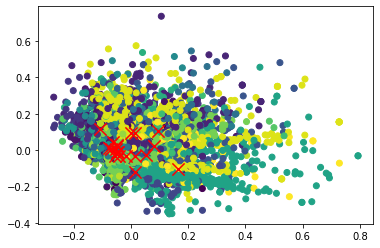

In [17]:
plt.scatter(reduced_features[:,0], reduced_features[:,1], c=cls.predict(features))
plt.scatter(reduced_cluster_centers[:, 0], reduced_cluster_centers[:,1], marker='x', s=150, c='r')

In [18]:
from sklearn.metrics import homogeneity_score
homogeneity_score(course.label, cls.predict(features))

0.2874042247222121

In [19]:
from sklearn.metrics import silhouette_score
silhouette_score(features, labels=cls.predict(features))

0.02830465456276737

In [20]:
from sklearn.metrics import completeness_score
completeness_score(course.label, cls.predict(features))

0.6316207990801337

In [22]:
def find_cluster_from_name(name):
    return cls.predict(vec.transform([name]))[0]

In [23]:
find_cluster_from_name("Machine Learning")

15

In [24]:
find_cluster_from_name("Deep Learning")

15

In [25]:
def recomend_course(name):
    # recomend 5 most similar courses
    return course.loc[cls.labels_ == find_cluster_from_name(name), "course_name"].values[:5]

In [26]:
recomend_course("data science")

array(['Information Retrieval and Mining Massive Data Sets',
       'Introduction to Data Structures & Algorithms in Java',
       'Collect, Extract and Use Online Data Quickly and More Easily',
       'Data Loss Prevention', 'Data Warehousing'], dtype=object)

In [27]:
recomend_course("web development")

array(['Javascript for Beginners',
       'JavaScript with BackboneJS and Bootstrap CSS - Advanced',
       'Learning JavaScript Programming Tutorial. A Definitive Guide',
       'HTML5 APIs For JavaScript - A Course For Web Developers ',
       'Learn To Program JavaScript (in ten easy steps)'], dtype=object)

In [28]:
recomend_course("mobile development")

array(['Objective C for iPhone-iPad App Programming',
       'Beginner Mobile App Development with Appcelerator Titanium',
       'How to add In App Purchases to your iPhone app the easy way',
       'iOS for Beginners - How to create your own app',
       'IOS7 App Development - Easy iPhone Xcode Reskinning'],
      dtype=object)

In [45]:
recomend_course("python")

array(["Learn Python, it's CAKE (Beginners)",
       'Web Programming with Python',
       'Pythonic Python Part I: The Basics',
       'The Ultimate Python Programming Tutorial ',
       'Learn Python GUI programming using Qt framework'], dtype=object)

In [69]:
cls = KMeans(n_clusters=20, random_state=0)
cls.fit(features)

KMeans(n_clusters=20, random_state=0)

In [70]:
cls.predict(features)

array([14,  0,  4, ..., 10,  3,  0])

In [71]:
cls.labels_

array([14,  0,  4, ..., 10,  3,  0])

In [72]:
pca = PCA(n_components=2, random_state=0)

In [73]:
reduced_features = pca.fit_transform(features.toarray())

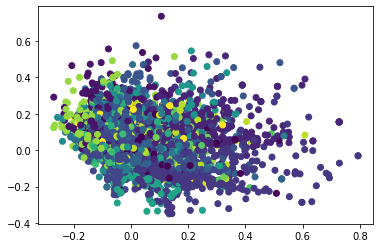

In [74]:
plt.scatter(reduced_features[:,0], reduced_features[:,1], c=cls.predict(features))

In [75]:
from sklearn.metrics import homogeneity_score

In [76]:
homogeneity_score(course.label, cls.predict(features))

0.23859790177914822

In [79]:
from sklearn.metrics import silhouette_score

In [80]:
silhouette_score(features, labels=cls.predict(features))

0.03256823451458331

In [81]:
from sklearn.metrics import completeness_score

In [82]:
completeness_score(course.label, cls.predict(features))

0.5479636401113874

In [83]:
def find_cluster_from_name(name):
    return cls.predict(vec.transform([name]))[0]

In [84]:
find_cluster_from_name("Machine Learning")

4

In [85]:
find_cluster_from_name("Deep Learning")

4

In [86]:
def recomend_course(name):
    # recomend 5 most similar courses
    return course.loc[cls.labels_ == find_cluster_from_name(name), "course_name"].values[:5]

In [87]:
recomend_course("data science")

array(['Information Retrieval and Mining Massive Data Sets',
       'Introduction to Data Structures & Algorithms in Java',
       'Data Loss Prevention', 'Data Warehousing',
       'Master Data Management'], dtype=object)

In [88]:
recomend_course("web development")

array(['Become a Web Developer from Scratch',
       'Become a Certified Web Developer', 'AJAX Development',
       'Learning CSS3 - A Comprehensive Tutorial For Web Developers',
       'The Complete 2019 Fullstack Web Developer Course'], dtype=object)

In [89]:
recomend_course("mobile development")

array(['Become a Web Developer from Scratch',
       'Become a Certified Web Developer', 'AJAX Development',
       'Learning CSS3 - A Comprehensive Tutorial For Web Developers',
       'The Complete 2019 Fullstack Web Developer Course'], dtype=object)

In [90]:
recomend_course("python")

array(["Learn Python, it's CAKE (Beginners)",
       'Web Programming with Python',
       'Pythonic Python Part I: The Basics',
       'The Ultimate Python Programming Tutorial ',
       'Learn Python GUI programming using Qt framework'], dtype=object)

In [94]:
cls = Birch(n_clusters=20, threshold=0.5, branching_factor=50)
cls.fit(features)

Birch(n_clusters=20)

In [95]:
cls.predict(features)

array([16,  0, 14, ...,  0,  0,  0], dtype=int64)

In [96]:
cls.labels_

array([16,  0, 14, ...,  0,  0,  0], dtype=int64)

In [97]:
pca = PCA(n_components=2, random_state=0)

In [98]:
reduced_features = pca.fit_transform(features.toarray())

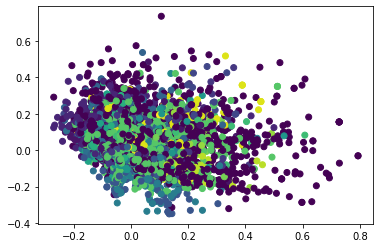

In [99]:
plt.scatter(reduced_features[:,0], reduced_features[:,1], c=cls.predict(features))

In [100]:
from sklearn.metrics import homogeneity_score

In [101]:
homogeneity_score(course.label, cls.predict(features))

0.208258171421011

In [102]:
from sklearn.metrics import silhouette_score

In [103]:
silhouette_score(features, labels=cls.predict(features))

0.004205558127104221

In [105]:
from sklearn.metrics import completeness_score

In [106]:
completeness_score(course.label, cls.predict(features))

0.5469000111482403

In [107]:
def find_cluster_from_name(name):
    return cls.predict(vec.transform([name]))[0]

In [108]:
find_cluster_from_name("Machine Learning")

5

In [109]:
find_cluster_from_name("Deep Learning")

5

In [110]:
def recomend_course(name):
    # recomend 5 most similar courses
    return course.loc[cls.labels_ == find_cluster_from_name(name), "course_name"].values[:5]

In [111]:
recomend_course("data science")

array(['ODI 11g Hands On Tutorials',
       'Become a Hadoop Developer |Training|Tutorial ',
       'Introduction to Data Structures & Algorithms in Java',
       'SQL and Database for Analysts - Increase your team value',
       'Collect, Extract and Use Online Data Quickly and More Easily'],
      dtype=object)

In [112]:
recomend_course("web development")

array(['Basic and Advanced HTML Lessons',
       'HTML Tutorial: HTML & CSS for Beginners',
       'Programming Java for Beginners - The Ultimate Java Tutorial',
       'Introduction to Microsoft SQL Server Databases',
       'Learning C# .NET - Programming for Beginners. '], dtype=object)

In [113]:
recomend_course("mobile development")

array(['Learning CSS', 'CSS Development (with CSS3!)',
       'Become Exceptional in HTML and HTML5', 'CSS', 'HTML'],
      dtype=object)

In [114]:
recomend_course("python")

array(['Basic and Advanced HTML Lessons',
       'HTML Tutorial: HTML & CSS for Beginners',
       'Programming Java for Beginners - The Ultimate Java Tutorial',
       'Introduction to Microsoft SQL Server Databases',
       'Learning C# .NET - Programming for Beginners. '], dtype=object)

In [116]:
cls = AffinityPropagation(damping=0.5)
cls.fit(features)

AffinityPropagation()

In [117]:
cls.predict(features)

array([549, 586,  77, ..., 920, 869, 880], dtype=int64)

In [118]:
cls.labels_

array([549, 586,  77, ..., 920, 869, 880], dtype=int64)

In [119]:
pca = PCA(n_components=2, random_state=0)

In [120]:
reduced_features = pca.fit_transform(features.toarray())

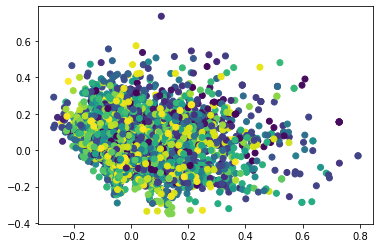

In [121]:
plt.scatter(reduced_features[:,0], reduced_features[:,1], c=cls.predict(features))

In [122]:
from sklearn.metrics import homogeneity_score

In [123]:
homogeneity_score(course.label, cls.predict(features))

0.7484514930994342

In [124]:
from sklearn.metrics import silhouette_score

In [125]:
silhouette_score(features, labels=cls.predict(features))

0.08569280112415956

In [126]:
from sklearn.metrics import completeness_score

In [127]:
completeness_score(course.label, cls.predict(features))

0.6290563004851474

In [128]:
def find_cluster_from_name(name):
    return cls.predict(vec.transform([name]))[0]

In [129]:
find_cluster_from_name("Machine Learning")

607

In [130]:
find_cluster_from_name("Deep Learning")

415

In [131]:
def recomend_course(name):
    # recomend 5 most similar courses
    return course.loc[cls.labels_ == find_cluster_from_name(name), "course_name"].values[:5]

In [132]:
recomend_course("data science")

array(['Core skill for data science: learn dplyr package in R',
       'Practical Data Science: Analyzing Stock Market Data with R',
       'Practical Data Science: Reducing High Dimensional Data in R',
       'Bite-Sized Data Science with Python and Pandas: Introduction',
       'R for Data Science Solutions'], dtype=object)

In [133]:
recomend_course("web development")

array(['Web Development: Make A Website That Will Sell For Thousands',
       'Web Application Development - Learn by Building 3 Web Apps',
       'Understanding the Web Development Process ',
       'HTML Simplified, Learning Web Development',
       'Running a Web Development Business: The Complete Guide'],
      dtype=object)

In [134]:
recomend_course("mobile development")

array(['Beginner Mobile App Development with Appcelerator Titanium',
       'Mobile App Biz Pro Secrets - Complete App Business In A Box!',
       'Rank Your Mobile App Higher & Faster. The Express Guide.',
       'Android - professional mobile development',
       'Android App Development – Making Your First App with Eclipse'],
      dtype=object)

In [136]:
recomend_course("python")

array(["Learn Python, it's CAKE (Beginners)",
       'Python Programming for Beginners', 'Python for Rookies',
       'Learn Python 2 and 3 Side by Side',
       'Learn Python: The Complete Python Programming Course'],
      dtype=object)

In [137]:
recomend_course("big data")

array(['Basic overview of Big Data Hadoop',
       'Big Data and Hadoop for Absolute Beginners',
       'Projects in Hadoop and Big Data - Learn by Building Apps',
       'Process Big Data using Apache PIG',
       'Hadoop Big Data - Must See Introduction to Big Data'],
      dtype=object)